In [199]:
#import sklearn
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import seaborn as sns
iris=datasets.load_iris()


In [200]:
df=pd.DataFrame(iris.data,columns=["sepal length","sepal width","petal length","petal width"])
target=pd.DataFrame(iris.target,columns=["label"])
dffinal=pd.concat([df,target],axis=1)



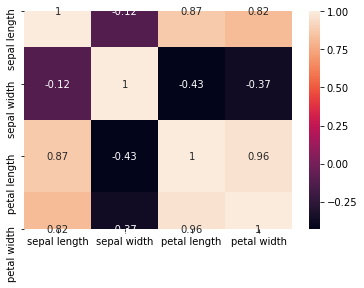

In [201]:
sns.heatmap(df.corr(),annot=True)

In [202]:
X=dffinal[["sepal length","sepal width","petal length","petal width"]]
y=dffinal['label']


In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
LR=LogisticRegression()
LR.fit(X_train,y_train)

c:\users\computek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\computek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
acc=metrics.accuracy_score(y_test, LR.predict(X_test))
print (acc)

0.9736842105263158


In [205]:
print(metrics.classification_report(y_test, LR.predict(X_test)))
print(metrics.confusion_matrix(y_test, LR.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      1.00      0.97        17
           2       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

[[10  0  0]
 [ 0 17  0]
 [ 0  1 10]]


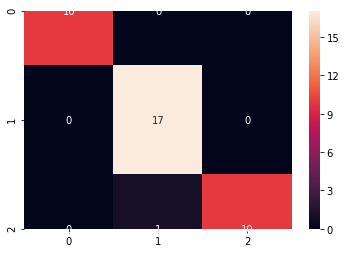

In [206]:
sns.heatmap(metrics.confusion_matrix(y_test, LR.predict(X_test)),annot=True)

In [207]:
clf = SVC()
clf.fit(X_train,y_train)

c:\users\computek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [208]:
acc=metrics.accuracy_score(y_test, clf.predict(X_test))
print (acc)

1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[10  0  0]
 [ 0 17  0]
 [ 0  0 11]]


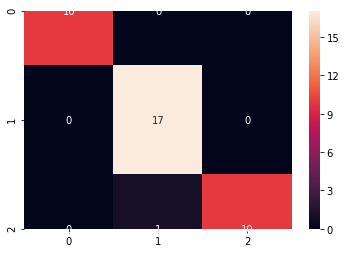

In [209]:
print(metrics.classification_report(y_test, clf.predict(X_test)))
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
sns.heatmap(metrics.confusion_matrix(y_test, LR.predict(X_test)),annot=True)

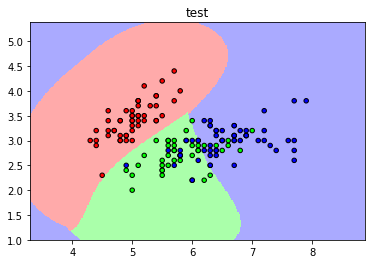

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


    # we create an instance of Neighbours Classifier and fit the data.
clf = SVC(gamma=1)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('test')
plt.show()